In [75]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm', 'put']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [76]:
df = pd.read_excel(r'C:\Users\samas\Downloads\Put_Call_RPFM.xlsx')

## Q1)

In [77]:
df['futures_price'] = df.Call + df.Strike - df.Put

In [78]:
df

,Strike,Call,Put,futures_price
0,20.0,38.99,0.01,58.98
1,22.5,36.52,0.04,58.98
2,25.0,34.06,0.08,58.98
3,27.5,31.64,0.16,58.98
4,30.0,29.28,0.30,58.98
...,...,...,...,...
66,82.5,1.16,24.68,58.98
67,85.0,1.00,27.02,58.98
68,87.5,0.89,29.41,58.98
69,90.0,0.79,31.81,58.98


## Q2)

In [79]:
from scipy.stats import norm


In [80]:
def d(sigma, S, K,r,t):
    d1 =1/(sigma * sqrt(t))*(log(S/K) + (r + sigma**2/2)* t)
    d2 = d1- sigma*sqrt(t)
    return d1, d2

In [81]:
def call(sigma, S, K, r, t):
    d1 =1/(sigma * sqrt(t))*(log(S/K) + (r + sigma**2/2)* t)
    d2 = d1- sigma*sqrt(t)
    c = norm.cdf(d1) *S - norm.cdf(d2) * K * exp(-r * t)
    return c

In [82]:
def impl_vol(S,K,r,t,c0):
    tol = 1e-3
    epsilon = 1
    count = 0
    max_iter = 1000
    vol = 0.5
    while  epsilon > tol:
        count += 1
        if count> max_iter:
            break
        orig_vol = vol
        d1, d2 = d(vol,S,K,r,t)
        func = call(vol, S, K, r, t) - c0
        vega = S * norm.pdf(d1) *sqrt(t)
        vol = -func/vega + vol
        epsilon = abs((vol - orig_vol)/orig_vol)
    return vol

In [83]:
v = []
for index, row in df.iterrows():
    S = 58.98
    K = row['Strike']
    r = 0
    t = 1
    c0 = row['Call']
    x = impl_vol(S,K,r,t,c0)
    v.append(x)

In [84]:
df['implied_vol'] = v

In [85]:
df

,Strike,Call,Put,futures_price,implied_vol
0,20.0,38.99,0.01,58.98,0.386474
1,22.5,36.52,0.04,58.98,0.402605
2,25.0,34.06,0.08,58.98,0.395856
3,27.5,31.64,0.16,58.98,0.395223
4,30.0,29.28,0.30,58.98,0.397289
...,...,...,...,...,...
66,82.5,1.16,24.68,58.98,0.285016
67,85.0,1.00,27.02,58.98,0.289244
68,87.5,0.89,29.41,58.98,0.295475
69,90.0,0.79,31.81,58.98,0.300938


## Q3)

<Figure size 1440x1440 with 0 Axes>

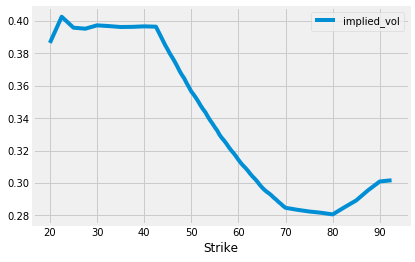

In [86]:
plt.figure(figsize=(20,20))
df.plot(x= 'Strike', y = 'implied_vol')
plt.style.use('fivethirtyeight')

## Q4)

In [87]:
import statsmodels.api as sm

In [88]:
df['strike_sq'] = df['Strike']**2

In [89]:
Y = df['implied_vol']
X = df[['Strike', 'strike_sq']]
X= sm.add_constant(X)
model = sm.OLS(Y,X)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            implied_vol   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.00e-27
Time:                        15:10:26   Log-Likelihood:                 194.64
No. Observations:                  71   AIC:                            -383.3
Df Residuals:                      68   BIC:                            -376.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5065      0.018     28.495      0.000       0.471       0.542
Strike        -0.0039      0.001     -6.225      0.000      -0.005      -0.003
strike_sq   1.465e-05   5.53e-06      2.647      0.010    3.61e-06    2.57e-05
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.218
Skew:                           0.124   Prob(JB):                        0.897
Kurtosis:                       2.890   Cond. No.                     3.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The t-stats for both strike and strike squared are -6.225, 2.647 respectively. This means that both the variables are significant in explaining the variablility of implied volatlity. An R squared of 83.6 is incredible which also says that 83.6% of variability in implied volatility is explained by the strike price, which makes sense.

## Q5)

## The Economic Interpretation of Skew and Smile in the graph is as follows:
## The graph is skewed right which implies that as the strike price approaches the future price, the implied volatility is low which reflects that the investors feel less risk for those call options with strike close to future price and thus low volatility, and the smile in the graph occurs when the strike is greater than the future price which reflects the fat tail returns which have very low probability and hence it makes sense that the implied volatility is rising due to the expectation of fat tail returns which have high volatility.
## These are consistent with the signs of the coefficients which we got from the regression.

In [90]:
df['Strike'].std() * (-0.0039) 

-0.0595160061659016

In [91]:
df['strike_sq'].std() * (1.465e-05)

0.02561776685130981

In [92]:
df['implied_vol'].std()

0.0388075496926272

## From the above values we can see a greater degree of deviation in implied volatilities is being explained by the Strike price and some degree by strike squared, but the total deviation can be explained by both the variables.

## Q6)

In [93]:
def d(sigma, S, K,r,t):
    d1 =1/(sigma * sqrt(t))*(log(S/K) + (r + sigma**2/2)* t)
    d2 = d1- sigma*sqrt(t)
    nd2 = norm.cdf(d2) 
    return nd2

In [94]:
d(0.314314,58.98,60,0,1)

0.41616740360069543

## From the above cell we get N(d2) as 0.42, If we look at the price differences of 59.5 call and 60.5 call, the value of the risk neutral probability will be 0.51 which is close to 0.42. The logic behind the statement is as follows:
## Suppose we write the 59.5 Call and buy the 60.5 Call and assume that if 60 Call is exercised both 59.5 and 60.5 are exercised as well and if not exercised, then both the other calls are not exercised. If we assume the risk neutral probability of exerise as 0.51, The expected value of the portfolio will be: (0.51)(S1-60.5-(S1-59.5)+0.51) + (0.49)(0.51) = 0. where S1-60.5 is the amount we get from 60.5 call if exercised and, S1-59.5 is amount we are obligated to pay if exercised and 0.51 is the price difference we earned while creating this portfolio. If both are not exercised then we will be left with 0.51 with a probability of (1-0.51) which is 0.49.  So assuming the price difference as risk neutral probability, supports the arbitrage free pricing of calls, so it makes sense to assume the price difference as risk neutral probability.

## Q7)

## If implied Volatility is constant, Call prices will be as follows

In [95]:
call(0.31,58.98,59.5,0,1) - call(0.31,58.98,60.5,0,1)

0.4167372409447694

In [96]:
d(0.314314,58.98,60,0,1)

0.41616740360069543

## We can see that if the implied volatility is constant at 0.31, then the difference in call prices is closer to N(d2) of 60 call.

## Q8)    

In [97]:
df

,Strike,Call,Put,futures_price,implied_vol,strike_sq
0,20.0,38.99,0.01,58.98,0.386474,400.00
1,22.5,36.52,0.04,58.98,0.402605,506.25
2,25.0,34.06,0.08,58.98,0.395856,625.00
3,27.5,31.64,0.16,58.98,0.395223,756.25
4,30.0,29.28,0.30,58.98,0.397289,900.00
...,...,...,...,...,...,...
66,82.5,1.16,24.68,58.98,0.285016,6806.25
67,85.0,1.00,27.02,58.98,0.289244,7225.00
68,87.5,0.89,29.41,58.98,0.295475,7656.25
69,90.0,0.79,31.81,58.98,0.300938,8100.00


In [98]:
nd2 = []
for index, row in df.iterrows():
    sigma = row['implied_vol']
    S = 58.98
    K = row['Strike']
    r = 0
    t =1
    p = d(sigma,S,K,r,t)
    nd2.append(p)

In [99]:
rnp =[]
for index, row in df.loc[1:69].iterrows():
    a = df['Call'][index - 1]
    b = df['Call'][index+1]
    c = a - b
    rnp.append(c)

In [100]:
len(rnp)

69

In [101]:
df1 = df.drop(index=[0,70])

In [102]:
df1['risk_neutral_prob'] = rnp

In [103]:
nd2 = nd2[1:70]

In [104]:
df1['Nd2'] = nd2

<Figure size 1440x1440 with 0 Axes>

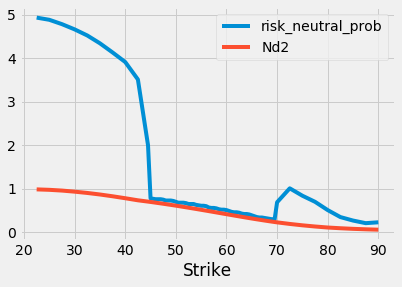

In [105]:
plt.figure(figsize=(20,20))
df1.plot(x = 'Strike', y = ['risk_neutral_prob','Nd2'])
plt.style.use('fivethirtyeight')

## From the plot we can see that the approximation of Nd2 to difference in prices makes sense when the strike price is around the future price of the underlying.

## Q9)

In [106]:
import math

In [107]:
def nCr(n, r):
 
    return (math.factorial(n) / (math.factorial(r) * math.factorial(n - r)))

In [108]:
def Binom_call(S,K,T,n):
    u = 1.1
    d = 0.9
    p = 0.5
    Binom_call = 0
    for i in range(0,n+1):
            Binom_call = Binom_call + nCr(n, i)*(p**i)*((1 - p)**(n - i)) * max(0, (S*(u**i)*(d**(n - i)))- K)


    return Binom_call
    

In [109]:
binom_4_step_call = []
for index, row in df.iterrows():
    S = 58.98
    K = row['Strike']
    T =1
    n = 4
    call = Binom_call(S,K,T,n)
    binom_4_step_call.append(call)

In [110]:
df['Binom_4_step_call'] = binom_4_step_call

In [111]:
df

,Strike,Call,Put,futures_price,implied_vol,strike_sq,Binom_4_step_call
0,20.0,38.99,0.01,58.98,0.386474,400.00,38.980000
1,22.5,36.52,0.04,58.98,0.402605,506.25,36.480000
2,25.0,34.06,0.08,58.98,0.395856,625.00,33.980000
3,27.5,31.64,0.16,58.98,0.395223,756.25,31.480000
4,30.0,29.28,0.30,58.98,0.397289,900.00,28.980000
...,...,...,...,...,...,...,...
66,82.5,1.16,24.68,58.98,0.285016,6806.25,0.240789
67,85.0,1.00,27.02,58.98,0.289244,7225.00,0.084539
68,87.5,0.89,29.41,58.98,0.295475,7656.25,0.000000
69,90.0,0.79,31.81,58.98,0.300938,8100.00,0.000000


In [112]:
def Binom_put(S,K,T,n):
    u = 1.1
    d = 0.9
    p = 0.5
    Binom_put = 0
    for i in range(0,n+1):
            Binom_put = Binom_put + nCr(n, i)*(p**i)*((1 - p)**(n - i)) * max(0, K - (S*(u**i)*(d**(n - i))))


    return Binom_put

In [113]:
binom_4_step_put = []
for index, row in df.iterrows():
    S = 58.98
    K = row['Strike']
    T =1
    n = 4
    put = Binom_put(S,K,T,n)
    binom_4_step_put.append(put)

In [114]:
df['Binom_4_step_put'] = binom_4_step_put

In [118]:
df[0:71]

,Strike,Call,Put,futures_price,implied_vol,strike_sq,Binom_4_step_call,Binom_4_step_put
0,20.0,38.99,0.01,58.98,0.386474,400.00,38.980000,0.000000
1,22.5,36.52,0.04,58.98,0.402605,506.25,36.480000,0.000000
2,25.0,34.06,0.08,58.98,0.395856,625.00,33.980000,0.000000
3,27.5,31.64,0.16,58.98,0.395223,756.25,31.480000,0.000000
4,30.0,29.28,0.30,58.98,0.397289,900.00,28.980000,0.000000
...,...,...,...,...,...,...,...,...
66,82.5,1.16,24.68,58.98,0.285016,6806.25,0.240789,23.760789
67,85.0,1.00,27.02,58.98,0.289244,7225.00,0.084539,26.104539
68,87.5,0.89,29.41,58.98,0.295475,7656.25,0.000000,28.520000
69,90.0,0.79,31.81,58.98,0.300938,8100.00,0.000000,31.020000


## Using 4 step binomial pricing model with up of 10%, down of 10% and p =0.5, we get close to approx values for prices.